# Machine Learning Workshp 1 : Model selection & evaluation
Welecome to our second workshop!
It consists of four tasks of advancing difficulty.
Please devote approximately 15 minutes per task
Prior to each task we will discuss some theoretical aspects regarding fundamental concepts of evaluation and selection of machine learning algorithms. We will explain the details of the Python functions and libraries that we will use.

# Table of Contents
1. [Theoretical and Computational Background - 1](#Background-1)
    1. [Pandas DataFrames](#Pandas-DataFrames)
    1. [Python Functions](#Python-Functions)
    1. [Noise Generation](#Noise-Generation)
    1. [Coefficient of determination](#Coefficient-of-determination)
    1. [Root Mean Squared Error](#Root-Mean-Squared-Error)
1. [Exercise 1:The basics of model evaluation](#Exercise-1:The-basics-of-model-evaluation)
1. [Theoretical and Computational Background - 2](#Background-2)
    1. [Accuracy](#Accuracy)
    1. [Confusion Matrix](#Confusion-Matrix)
    1. [Precision-Recall](#Precision---Recall)
1. [Exercise 2:Applying model evaluation metrics](#Exercise-2:-Applying-model-evaluation-metrics)
1. [Theoretical and Computational Background - 3](#Background-3)
1. [Exercise 3: Selecting the optimal model](#Exercise-3:-Selecting-the-optimal-model)
1. [Theoretical and Computational Background - 4](#Background-4)
1. [Exercise 4: Cross-Fold Validation](#Exercise-4-:-Cross-fold-validation)
1. [References](3References)
1. [Workshop Evaluation](#Workshop-Evaluation)

## Background 1

We will acquire here the following skills:
1. Learn about __pandas dataframes__
2. Code a __noise generation function__
3. What is and how to compute the __coefficient of determination ($R^2$)__
4. What is and how to compute the __Root Mean Squared Error (RMSE)__

### Pandas DataFrames
1. __Panel Data (Pandas)__ is a Python library used for working with datasets.
1. It has functions for analyzing, cleaning, exploring and manipulating data.
1. We import pandas using the ```import``` keyword: 
``` import pandas as pd```.
1. A pandas series is like a column in a table. It is a __one-dimensional array__ holding data of any type.
1. Here is an example of how to create a pandas Series: 
```python 
import pandas as pd
age=[23,35,45]
mySeries=pd.Series(age)
print(mySeries)
```
1. If nothing else is specified, the values are labeled with their index number.
1. First value has index 0, second has index 1, etc.
1. This label can be used to access a specified value: ```print(mySeries[0])```
1. You can name your own labels using the ```index``` argument: 
```python
import pandas as pd
age=[23,35,45]
mySeries=pd.Series(age,index=["Student 1","Student 2","Student 3"])
print(mySeries)
```
1. Data sets in Pandas are usually __multi-dimensional tables__, called __DataFrames__.
1. __Series__ is like a column, whereas a __DataFrame__ is the whole table.
1. A __Pandas DataFrame__ is a two-dimensional data structure. It is like a 2-D array/table with rows and columns: 
```python
import pandas as pd
data={
    "Weight":[70,89,90],
    "Height":[1.71,1.89,2.02]
}
#load data into a DataFrame object:
df=pd.DataFrame(data)
print(df)
```
1. Pandas use the ```loc``` attribute to return one or more specified rows: 
```python
#refer to the first row:
print(df.loc[0])
```
1. If we wish two or more rows, we use a list of indices:
```python
print(df.loc[[0,1]])
```
1. We can also give a name to each row:
```python
import pandas as pd
data={
    "Weight":[70,89,90],
    "Height":[1.71,1.89,2.02]
}
# load data into a DataFrame object:
df=pd.DataFrame(data,index=["Student 1","Student 2","Student 3"])
print(df)
```
1. If your dataset is stored in a file, __Pandas__ can load them into a __DataFrame__:
```python
import pandas as pd
df = pd.read_csv('data.csv')
print(df)
```
1. More information can be found in the following __[Pandas Tutorial](https://www.w3schools.com/python/pandas/default.asp)__

### Python Functions
1. A __function__ is a __block of code__, which only runs when it is called.
1. We can __pass data__, known as __parameters__ into a function.
1. A __function__ can __return data__ as a __result__.
1. In Python a function is defined using the __```def```__ keyword: 
```python
def my_function(parameters):
    body function
```
1. To __call__ a function, use the __function name__, followed by __parenthesis__: 
```python
function_name(parameters)
```

### Noise Generation
When we are generating synthetic data, we usually produce them through an equation (e.g. $y=ax+b$). Aiming to better simulate real-world conditions, we also generate some random noise, which we add then to the previous equation. To do so, we implement the following steps:

Firstly, we define the x-values by calling the function ```np.linspace(start,stop,num,endpoint=True,dtype,axis=0)```.
1. The __start__ and __stop__ values denote the starting and end value of the sequence.
1. If __```endpoint=True```__, the __stop__ parameter is the last sample. Otherwise, it is not included.
1. The __```dtype```__ is an optional parameter, denoting the type of the output array.
1. If it is not given, the data type is inferred from __start__ and __stop__.
1. The inferred dtype __will never be an integer__, since __float is chosen__ even if the arguments would produce an array of integers.

The __```numpy.random.normal(loc,scale,size)```__ draws __random__ samples from a __normal (Gaussian)__ distribution.
1. The __```loc```__ (float parameter) denotes the __mean/centre__ of the distribution.
1. The __```scale```__(float parameter) denotes the __standard deviation (spread\width)__ of the distribution. It must be non-negative.
1. The __```size```__(int or tuple of ints) is an optional parameter. It denotes the __output shape__. If the given shape is __```(m,n,k)```__, then __```m * n * k```__ samples are drawn.

According to the following, the function for generating synthetic data with noise may look like:
```python
# Noise Generation Function
def noise(mean_val,std_val,points):
    return np.random.normal(mean_val,std_val,points)

# Simulate the target variable
data= x**2+0.5+noise(0,0.5,points)
```

### Coefficient of determination
1. It is easy and intuitive to correlate.
1. Assume we have to predict the weight of several students according to their height information.
1. We may use the black line denoting the mean value. We may have a guess but is there a better approach?
1. This could be done by fitting a regression model.
1. The coefficient of Determination $R^2$ gives us a good measure of how well your model fits the data.
1. its formula is the following: $R^2 = 1 - \frac{{\text{Sum of Squares of Residuals}}}{{\text{Total Sum of Squares}}} $
1. It actually tells you how well the regression model fits the data.
1. The __$R^2$__ value ranges from __0 to 1__.
1. A __zero value__ indicates that the regression model __explains none of the variance in the dependent variable__ (poor fit).
1. __Higher values__ indicate a __better fit__, meaning that a __larger proportion of the data variability__ is explained by the model.
1. You may use this evaluation metric in Python by importing the r2_score from the sklearn.metrics:
```python
from sklearn.metrics import r2_score
```
<br>

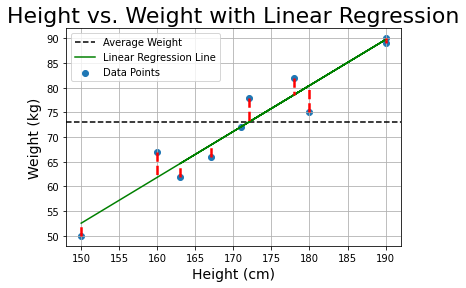

### Root Mean Squared Error
1. It quantifies the __average magnitude__ of the errors or residuals.
1. These are the __differences between the predicted and the observed values__ in model's predictions.
1. It is a measure of __how well__ the predicted values are aligned with the actual values.
1. Its mathematic formula is given by $ RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2} $
1. The number of data points are denoted by the variable $n$.
1. The actual values of the dependent variable are denoted by $y_i$.
1. The predicted values of the dependent variable are denoted by $\hat{y}_i$.
1. The __RMSE__ is expressed in the same units as the dependent variable, making it interpretable.
1. __Smaller RMSE values__ indicate that the model's predictions __are closer__ to the actual values and therefore a __better fit__ to the data.
1. In Python, you can calculate the __RMSE__ using the following code:

```python
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming you have y_true (observed values) and y_pred (predicted values)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print("RMSE:", rmse)
```

# Exercise 1:The basics of model evaluation
In this exercise you will learn how to evaluate the performance of two regression models according to basic evaluation metrics such as the __Root Mean Squared Error__ and the __$R^2$__.
<br>
To do so you firstly load the __'Exercise1.csv'__ file which contains one column for training, validation and test data respectively. Each category consists of 100 sample points (usually you will have 60% train data, 20% validation data and 20% test data).
Then, you should create the following two models: __Model1__ which is given by the equation $y1=x+0.5$ and __Model2__ which is given by the equation $y2=0.8x^2+0.5$.
1. Visualize the train data and the two models. Which one seems to be closer to the actual data distribution?
1. Justify your reply by quantifying the __Root Mean Squared Error__ and the __$R^2$__ for each one model.
1. How can you interpret the Coefficient of determination for Model 1?
1. Compute again the evaluation metrics for the validation and test data. How the values change? What can you conclude?

In [ ]:
# Place the code here

## Background 2
We will revise here the concept of binary classification as well as its most known evaluation metrics, which are:
1. __Accuracy__
2. __Confusion Matrix__
3. __Precision-Recall__

### Accuracy
1. It is a common metric used to quantify the overall correctness of the predictions made by a classification model.
1. It quantifies the __ratio__ of __correctly predicted__ instances to the __total number__ of instances in the dataset.
1. Its mathematical formula is : $ \text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}}$
1. It is typically expressed as a __percentage ratio__.
1. __Higher values__ indicate a __better-performing__ model.
1. __Accuracy__ can be __misleading__ in case of __imbalanced__ datasets.
1. In Python, we calculate __accuracy__ as follows:

```python
from sklearn.metrics import accuracy_score

# Assuming you have y_true (true class labels) and y_pred (predicted class labels)
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)
```

### Confusion Matrix
1. It is a __table__ used in __classification tasks__ to __evaluate__ the __performance__ of a machine learning model.
1. It is very popular in __binay classification__ problems, where there are __two__ possible outcomes: __positive__ and __negative__.
1. It provides a __detailed breakdown__ of the model's __predictions__ and the __actual__ class labels.
<br>

The __confusion matrix__ consists of __four__ important __metrics__:


1. __True Positives (TP)__: These are cases in which the model __correctly__ predicted the __positive__ class.
1. __True Negatives (TN)__: These are cases in which the model __correctly__ predicted the __negative__ class.
1. __False Positives (FP)__: These are cases in which the model __incorrectly__ predicted the __positive__ class when it was actually the __negative__ class. Also known as __"Type I error"__.
1. __False Negatives (FN)__: These are cases in which the model __incorrectly__ predicted the __negative__ class when it was actually the __positive__ class.Also known as __"Type II error"__.

To __compute__ and __visualize__ the __confusion matrix__ in Python, you may use the following code:
``` python
import matplotlib.pyplot as plt
from sklearn import metrics
# Assuming that y_actual are the true outputs and y_predicted are the outputs predicted by the model
confusion_matrix=metrics.confusion_matrix(y_actual,y_predicted)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=[False,True])
cm_display.plot()
plt.show()

```
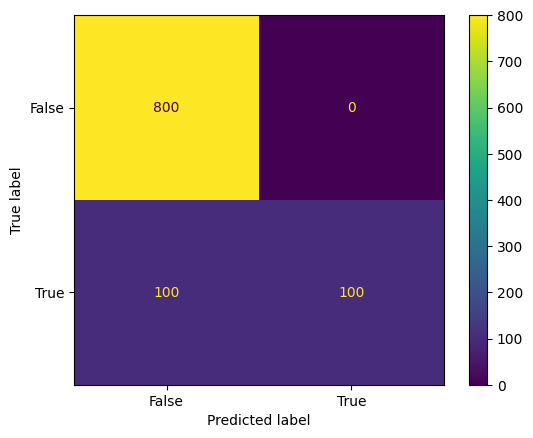

So, the __confusion matrix__ provides a __comprehensive view__ of the model's performance. It __reveals__ not only the number of correct and incorrect predictions, but also the __types of errors__ the model is making. It is a __valuable tool__ for __evaluating classification models__ and __making informed decisions__ about __model improvements__ and __adjustments__.

### Precision - Recall
1. __Precision (P)__ is defined as the number of __true positives__ over the number of __true positives__ plus the number of __false positives__.
1. Its mathematical formula is : $\text{Precision} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Positives (FP)}}$
1.  __Recall (R)__ is defined as the number of __true positives__ over the number of __true positives__ plus the number of __false negatives__.
1. It is a __useful__ measure of success of prediction, when the __classes__ are very __imbalanced__.
1. Its mathematical formula is : $\text{Recall} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Negatives (FN)}}$
1. __Precision__ quantifies the __model's ability__ to identify __only the relevant cases__ within a dataset.
1. __Recall__ quantifies the __model's ability__ to find __all the relevant cases__ within a dataset.

# Exercise 2: Applying model evaluation metrics
In this exercise you will learn how to apply the most common classification evaluation metrics such as the __1) accuracy, 2) confusion matrix, 3) precision and recall__. You will also to learn to identify cases that a specific metric is not indicative of the actual performance of the algorithm.

1. Firstly, you load as a __dataframe__ the __'Classification.csv'__ file provided to you.
2. Compute the accuracy metric and discuss the obtained value.
3. Then estimate the confusion matrix and compare the results with the accuracy score. What do you observe?
4. Finally estimate the precision and recall scores and make a comparative synthesis of the performance of the classification model.

In [1]:
# Place the code here

## Background 3
Apart from __linear__ decision boundaries, we may need to define __non-linear__ ones such as a __circular__ decision boundary. To do so, we need to __plot a circle__ using the Matplotlib library. To do so, we implement the following steps:
1. Firstly, we define the center and radius of the circle:
```python
# Define the center and radius of the circle
center = (0, 0)
radius = 1
```
1. Then, we create an array of angles (theta) from $0$ to $2*pi$:
```python
theta = np.linspace(0, 2*np.pi, 100)
```
1. Calculate the x and y coordinates of the points on the circle:
```python
x = center[0] + radius * np.cos(theta)
y = center[1] + radius * np.sin(theta)
```

# Exercise 3: Selecting the optimal model
In this exercise you will learn to select the most suitable model according to your data.
1. Firstly, you load the file __'Dataset1.csv'__. Visualize the data of the two classes (Class 1 would be with blue and class 2 will be with red color.
1. Which is the equation of the __optimal decision boundary__?
1. Compute that boundary by __quantifying the parameters of the equation__ and visualize it (in the same graph with the two class) with green color.
1. Compute the accuracy and the confusion matrix for that dataset and decision boundary.
1. Repeat the same steps for the file __'Dataset2.csv'__. Why do you have different results now?

## Background 4
__Cross-fold validation__ is a widely used technique to assess the __performance__ and __generalization__ of a machine learning model.
It helps in __estimating how well__ a model will __perform__ on __unseen data__, which is crucial for __avoiding__ either __overfitting__ or __underfitting__.
<br>
It involves __dividing__ a dataset into __multiple subsets or folds__, __training__ and __evaluating__ the model __multiple times__ and then __aggregating__ the results.
<br>
One of the __most commonly used__ cross-validation techniques is __k-fold cross-validation__.
<br>
To __perform k=5__ cross-fold validation in Python, you should insert the following libraries:
```python
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np
```
Then you __create__ a __k-fold__ cross-validation object:
```python
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
```

# Exercise 4 : Cross-fold validation
In this exercise we will dive into the importance of cross-fold validation.
1. Firstly, we will __generate five different data distributions__ followng the model __$y=2*x+3$__. Each distribution consists of __100 data points__ of varying noise characteristics. More specifically, all noise distributions have __zero mean value__ but their __standard deviation__ would be __a) 1, b) 3, c) 0.5, d) 4 and e) 2__. Once you create these distributions, __concatenate__ them so as to __form the X and y data__.
2. __Visualize__ the X and y data in a __scatterplot__. Observe, that they follow the line equation __$y=2*x+3$__ but there are a lot of outliers.
3. Then, perform __5-fold cross-validation__ and compute the __evaluation metrics__ on the entire dataset.

In [2]:
# Place the code here

# References
__[Metrics and scoring in sklearn](https://scikit-learn.org/stable/modules/model_evaluation.html)__
<br>
__[Cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html)__
<br>
__[An introduction to Jupyter Notebook](https://realpython.com/jupyter-notebook-introduction/)__
<br>
__[Mean Squared Error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)__
<br>
__[Coefficient of determination](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)__
<br>
__[Accuracy Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)__
<br>
__[Confusion Matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)__
<br>
__[Python Pandas Documentation](https://pandas.pydata.org/docs/user_guide/index.html#user-guide)__

# Workshop Evaluation
Please visit the following link for __[Workshop 2 Evaluation](https://app.wooclap.com/PIHHOO?from=event-page)__
<br>
Tell us your opinion about this workshop and how we could become better in the next one.
<br>
__Your opinion matters!!!__